# Classification - Decision Tree

Now we try a Decision Tree Classifier from sklearn on the same Iris data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [16]:
# Import feature subset with Major_Occupation Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('occupationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE.fillna(0, inplace=True)

X = dfOHE

#separate target values
y = originalDF['Major_Occupation'].values

predNames = dfOHE.columns

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Not_Purchasing_Privacy'
c2 = 'Not_Purchasing_Prefer_people'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


We also look at comparing different decision trees to the `PetalWidth` $\times$ `PetalLength` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting ../../pic/depth_2_gini_decisionTree_Iris_NotPurchasingPrivacy_NotPurchasingPreferPeople.pdf


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['Other' 'Other' 'Computer' ... 'Other' 'Education' 'Computer'].

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a208ecae8> (for post_execute):


TypeError: iteration over a 0-d array

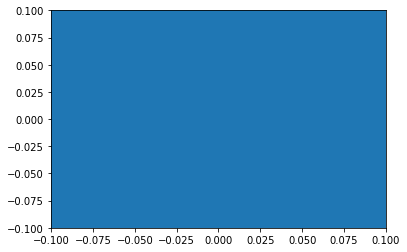

In [18]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Iris")
    fileTitle = "../../pic/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Iris", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

Previous decision trees were based on just two predictors (`PetalWidth` and `PetalLength`) as this made visualisation easier. However, if we include all 4 predictors, we see that the fit can improve (score improves to 0.97 from 0.93).

In [19]:
criterion = "entropy"
treeDepth = 5
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.4559841740850643
[[198  30   0  45 144]
 [ 69 241   1  55 102]
 [ 44   7   4  82  99]
 [ 24  30   7 306 101]
 [ 92  14   3 151 173]]
              precision    recall  f1-score   support

    Computer      0.464     0.475     0.469       417
   Education      0.748     0.515     0.610       468
  Management      0.267     0.017     0.032       236
       Other      0.479     0.654     0.553       468
Professional      0.279     0.400     0.329       433

   micro avg      0.456     0.456     0.456      2022
   macro avg      0.447     0.412     0.399      2022
weighted avg      0.471     0.456     0.440      2022



One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

In [21]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['a', 'b', 'c'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("../../pic/tree.pdf")


IndexError: list index out of range